In [1]:
import itk
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
# Requires ITKIOScanco 

In [2]:
def itk_sitk(image):
    sitk_image = sitk.GetImageFromArray(
        itk.GetArrayFromImage(image),
        isVector=image.GetNumberOfComponentsPerPixel() > 1,
    )
    sitk_image.SetOrigin(tuple(image.GetOrigin()))
    sitk_image.SetSpacing(tuple(image.GetSpacing()))
    sitk_image.SetDirection(itk.GetArrayFromMatrix(image.GetDirection()).flatten())
    return sitk_image

In [3]:
def read_aim(path, dtype="signed short"):
    image_type = itk.Image[itk.ctype(dtype), 3]
    reader = itk.ImageFileReader[image_type].New()
    image_io = itk.ScancoImageIO.New()
    reader.SetImageIO(image_io)
    reader.SetFileName(path)
    reader.Update()
    img = reader.GetOutput()
    # print(np.sum(itk.GetArrayFromImage(img)))
    return itk_sitk(img)


In [22]:
def read_and_plot(path):
    fig, ax = plt.subplots(1, 5, figsize=(15, 5))
    images = []
    for i, filename in enumerate(os.listdir(path)):
        if "mask" in filename:
            images.append(read_aim(os.path.join(path, filename), dtype="unsigned char"))
        elif "seg" in filename:
            images.append(read_aim(os.path.join(path, filename), dtype="float16"))
        else:
            images.append(read_aim(os.path.join(path, filename)))
        
        ax[i].imshow(sitk.GetArrayFromImage(images[i])[50, :, :])
        ax[i].set_title(filename)
    return images
        
    

KeyError: "Unrecognized C type 'float16'"

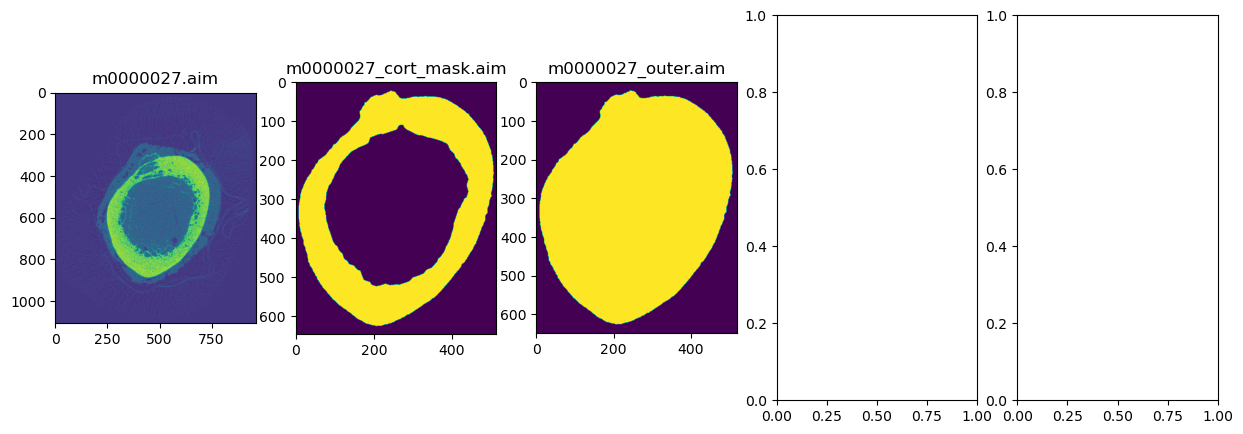

In [23]:
images_1 = read_and_plot("..\\data\\HRpQCT_aim\\aim\\flowbone_2207_04650_l__m")

itkSize3 ([519, 650, 151])
itkPointD3 ([14.3251, 16.0245, 0])
itkSize3 ([512, 644, 150])
itkPointD3 ([14.5072, 16.2066, 0])
itkSize3 ([962, 1106, 150])
itkPointD3 ([0, 0, 0])
itkSize3 ([514, 646, 151])
itkPointD3 ([14.4465, 16.1459, 0])
itkSize3 ([519, 650, 151])
itkPointD3 ([14.3251, 16.0244, 0])


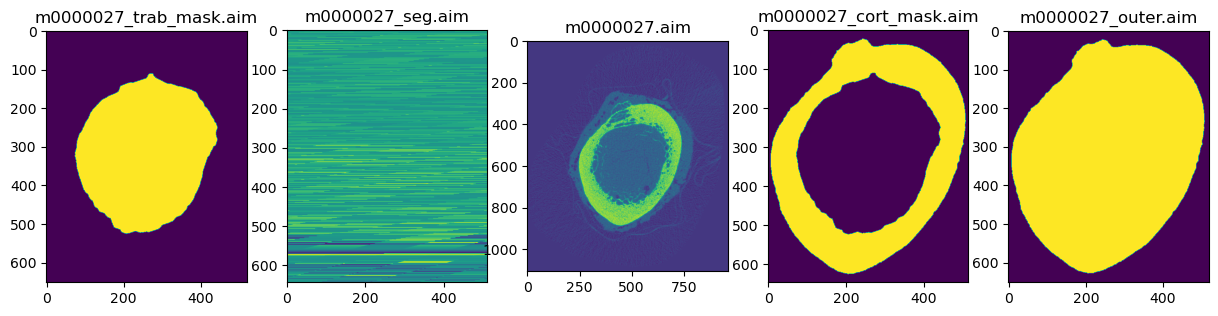

In [165]:
images_2 = read_and_plot("../data/data/projects/pcct/flowbone_2207_04650_l__m")


itkSize3 ([780, 1042, 151])
itkPointD3 ([16.8745, 13.9002, 0])
itkSize3 ([1138, 1661, 150])
itkPointD3 ([0, 0, 0])
itkSize3 ([772, 1034, 150])
itkPointD3 ([17.178, 14.143, 0])
itkSize3 ([775, 1036, 151])
itkPointD3 ([17.0566, 14.0823, 0])
itkSize3 ([780, 1042, 151])
itkPointD3 ([16.8745, 13.9002, 0])


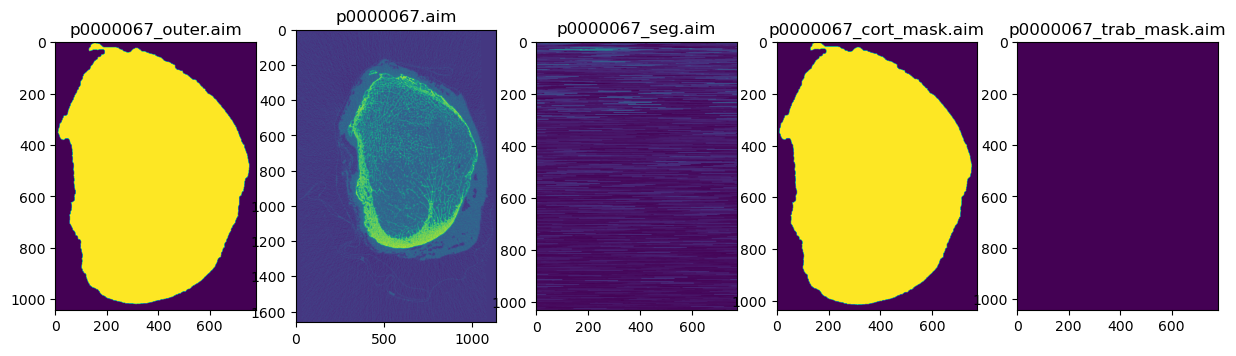

In [152]:
images_3 = read_and_plot("../data/data/projects/pcct/flowbone_2209_05877_r__p")

In [146]:
def plot_mask_in_image(image, mask):
    # Calculate new origin of mask
    mask_origin = np.array(mask.GetOrigin())
    print(mask_origin)
    mask_spacing = np.array(mask.GetSpacing())
    print(mask_spacing)
    mask_origin = mask_origin / mask_spacing
    mask_origin = np.round(mask_origin).astype(int)

    # print(mask_origin)
    image = sitk.GetArrayFromImage(image[:, :, 0])
    mask = sitk.GetArrayFromImage(mask[:, :, 0])
    mask[mask > 0] = 16
    new_mask = np.zeros(image.shape)
    print(mask_origin)
    print(image.shape)
    print(new_mask.shape)

    new_mask[mask_origin[1]:mask_origin[1] + mask.shape[0], mask_origin[0]:mask_origin[0] + mask.shape[1]] = mask
    
    plt.imshow(image, cmap="gray")
    plt.imshow(new_mask, cmap='Blues', alpha=0.5)
    plt.show()

    


[22.94426155 27.98247528  0.        ]
[0.06069911 0.06069951 0.06069079]
[378 461   0]
(1831, 1080)
(1831, 1080)


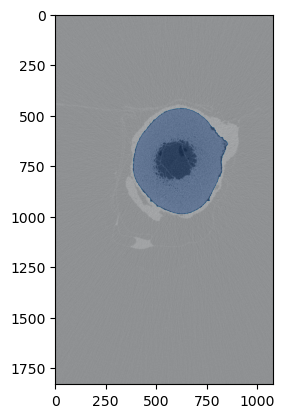

In [147]:
plot_mask_in_image(images_1[-1], images_1[-2])

[238 266   0]
(1106, 962)
(1106, 962)


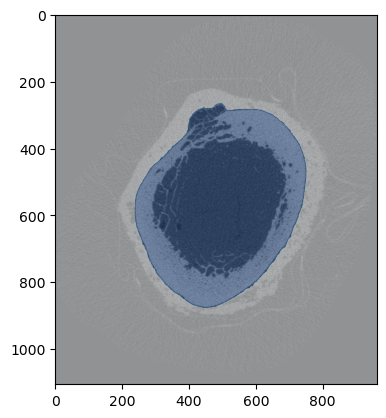

In [125]:
plot_mask_in_image(images_2[2], images_2[3])

In [28]:
def load_folder(path):
    fig, ax = plt.subplots(1, 5, figsize=(15, 5))
    i = 0
    for file in os.listdir(path):
        if file.endswith(".npy"):
            data = np.load(os.path.join(path, file))
            ax[i].imshow(data[0, :, :], cmap="gray")
            ax[i].set_title(file.split('_')[-1])
            i += 1
    plt.show()

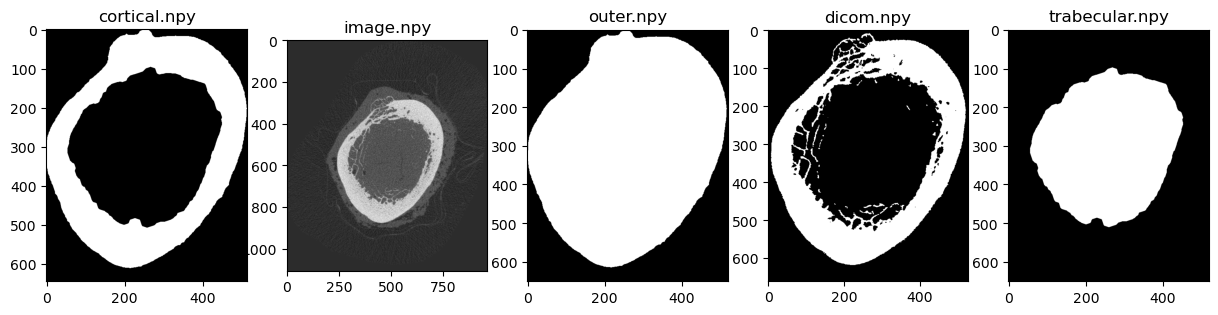

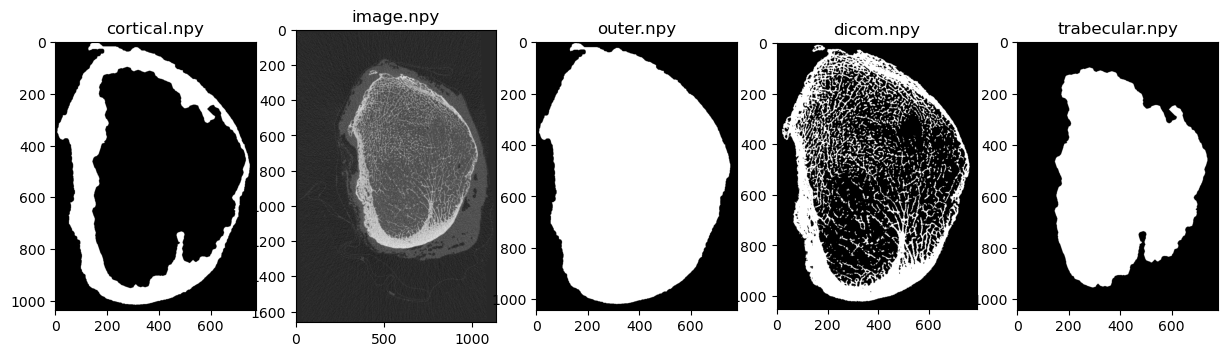

: 

In [29]:
base_path = r"C:\Users\Yannick\Documents\repos\deep_femur_segmentation\data\HRpQCT_aim\numpy"
load_folder(os.path.join(base_path, "flowbone_2207_04650_l__m"))
load_folder(os.path.join(base_path, "flowbone_2209_05877_r__p"))
